# Data Analysis in Python

## Certification Project 5: "Sea Level Prediction"

### from [FreeCodeCamp.org](https://www.freecodecamp.org)


### [Click here for an Overview of Project Requirements](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/sea-level-predictor)


In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [18]:
def draw_plot():
    # Read data from file
    df = pd.read_csv('epa-sea-level.csv')

    # Create scatter plot
    ax = plt.subplots(figsize=(14, 6))[1]
    # *** In addition, I'm setting x and y limits on the plot axes to pass all automated tests
    ax.set_xlim(left=1850, right=2075)
    ax.set_ylim(bottom=-1, top=17)
    ax.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], 4, c='w')

    # Create first line of best fit
    linreg_1 = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
    # *** we're using ax.add_line() to meet the project requirements that the regression line data
    # *** conform to a specific size with exact values.
    # *** In practice, I think ax.axes.axline looks better, and is also quicker to code
    # *** because it can take a point tuple and a slope as a parameter, eliminating the need
    # *** for the lower-level math you see in the lines below.
    l1_xdata = np.linspace(1880, 2050, 171)
    l1_ydata = np.linspace(1880 * linreg_1.slope + linreg_1.intercept, linreg_1.slope * 2050 + linreg_1.intercept, 171)
    ax.add_line(plt.Line2D(l1_xdata, l1_ydata, linewidth=2.5, color='g', linestyle='-'))

    # Create second line of best fit
    df_recent = df[df['Year'] >= 2000]
    linreg_2 = linregress(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'])
    l2_xdata = np.linspace(2000, 2050, 51)
    l2_ydata = np.linspace(2000 *linreg_2.slope + linreg_2.intercept, linreg_2.slope * 2050 + linreg_2.intercept, 51)
    ax.add_line(plt.Line2D(l2_xdata, l2_ydata, linewidth=2.5, color="r", linestyle="-"))

    # Add labels and title
    ax.set_title('Rise in Sea Level')
    ax.set_xlabel('Year')
    ax.set_ylabel('Sea Level (inches)')
    
    # *** I added a legend for completeness.
    ax.legend(['Sea level by year', 'Regression line from 1880', 'Regression line from 2000'])

    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

# test case:

draw_plot()

## Test of function output:

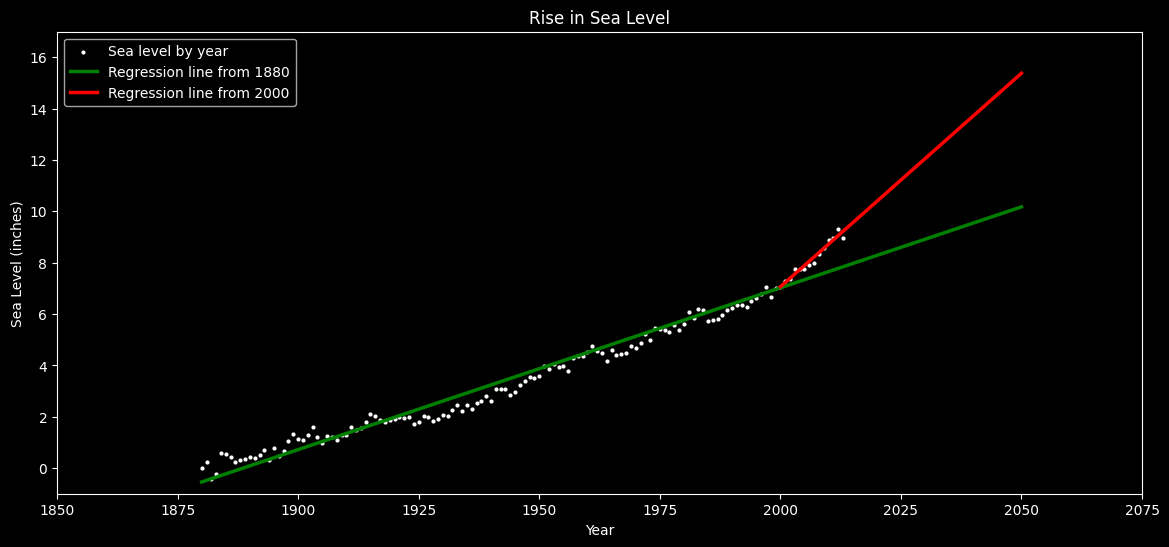

In [19]:
plot = draw_plot()